In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file
df_pre = pd.read_csv("german_credit.csv")
print (df_pre.shape)
print (df_pre.columns)
df_pre.head(5)

(1000, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
# Randomly select 50% data for this use case
from sklearn.model_selection import train_test_split
out_data,df =train_test_split(df_pre, train_size = 0.5,random_state=5)
print (df.shape)
print (df.columns)
df.head(5)

(500, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
544,0,no checking account,12,critical account/ other credits existing (not ...,car (new),1255,... < 100 DM,.. >= 7 years,4,male : single,...,4,real estate,61,none,own,2,unskilled - resident,1,none,yes
515,0,< 0 DM,6,critical account/ other credits existing (not ...,car (new),609,... < 100 DM,4 <= ... < 7 years,4,female : divorced/separated/married,...,3,if not A121 : building society savings agreeme...,37,none,own,2,skilled employee / official,1,none,no
193,0,no checking account,6,existing credits paid back duly till now,domestic appliances,2108,... < 100 DM,4 <= ... < 7 years,2,male : married/widowed,...,2,real estate,29,none,rent,1,skilled employee / official,1,none,yes
11,1,< 0 DM,48,existing credits paid back duly till now,business,4308,... < 100 DM,... < 1 year,3,female : divorced/separated/married,...,4,if not A121 : building society savings agreeme...,24,none,rent,1,skilled employee / official,1,none,yes
279,0,no checking account,24,existing credits paid back duly till now,domestic appliances,1901,100 <= ... < 500 DM,1 <= ... < 4 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",29,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes


In [4]:
# Lets build a Ensemble model but need to modify the dataset first
obj_df=df.select_dtypes(include=['object'])
obj_df.head()

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
544,no checking account,critical account/ other credits existing (not ...,car (new),... < 100 DM,.. >= 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
515,< 0 DM,critical account/ other credits existing (not ...,car (new),... < 100 DM,4 <= ... < 7 years,female : divorced/separated/married,none,if not A121 : building society savings agreeme...,none,own,skilled employee / official,none,no
193,no checking account,existing credits paid back duly till now,domestic appliances,... < 100 DM,4 <= ... < 7 years,male : married/widowed,none,real estate,none,rent,skilled employee / official,none,yes
11,< 0 DM,existing credits paid back duly till now,business,... < 100 DM,... < 1 year,female : divorced/separated/married,none,if not A121 : building society savings agreeme...,none,rent,skilled employee / official,none,yes
279,no checking account,existing credits paid back duly till now,domestic appliances,100 <= ... < 500 DM,1 <= ... < 4 years,male : single,none,"if not A121/A122 : car or other, not in attrib...",none,rent,management/ self-employed/ highly qualified em...,"yes, registered under the customers name",yes


In [5]:
dff=pd.get_dummies(df, columns=['account_check_status','credit_history','purpose','savings',
       'present_emp_since','personal_status_sex', 'other_debtors','property','other_installment_plans', 'housing','job','foreign_worker'])

In [6]:
dff.shape

(500, 61)

In [7]:
# Lets check for highly correlated variables
cor= dff.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.55) | (cor< -0.55)]

credit_amount                                            duration_in_month                                                             0.583234
credit_history_existing credits paid back duly till now  credit_history_critical account/ other credits existing (not at this bank)   -0.670328
savings_unknown/ no savings account                      savings_... < 100 DM                                                         -0.609828
personal_status_sex_male : single                        personal_status_sex_female : divorced/separated/married                      -0.766802
other_debtors_none                                       other_debtors_co-applicant                                                   -0.678394
                                                         other_debtors_guarantor                                                      -0.690725
other_installment_plans_none                             other_installment_plans_bank                                                 -0

In [8]:
#Drop irrelavent data
dff=dff.drop(["telephone","foreign_worker_yes","job_unskilled - resident","housing_rent","other_installment_plans_bank","other_debtors_co-applicant"],axis=1)

In [9]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

y = dff['default']
X = dff.loc[:, dff.columns != 'default']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 54), (150, 54), (350,), (150,))

In [10]:
#Build RF Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfm=rf.fit(X_train, y_train)

In [11]:
preds = rf.predict_proba(X_test)[:,1]
y_pred=rf.predict(X_test)

In [12]:
#calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def calculate_confusion_matrix(y_true, y_pred):
    
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

In [13]:
calculate_confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

[[95  1]
 [42 12]]
0.7133333333333334


Text(0.5, 0, 'Relative Importance')

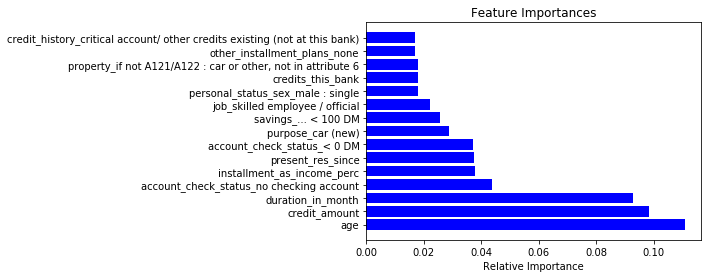

In [14]:
# View a list of the features and their importance scores
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = dff.columns[:]
features= a.drop('default',1)
#plot it
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [15]:
trainResult = rf.score(X_train, y_train)
testResult = rf.score(X_test, y_test)

In [16]:
"Train Accuracy:"
(trainResult*100.0)

100.0

In [17]:
"Test Accuracy:"
(testResult*100.0)

71.33333333333334

In [28]:
random_clf = RandomForestClassifier(n_estimators=10, criterion='gini',max_depth=1, min_samples_leaf=0.1)
random_clf.fit(X_train, y_train)
# make class predictions for the testing set
y_pred =  random_clf.predict(X_test)

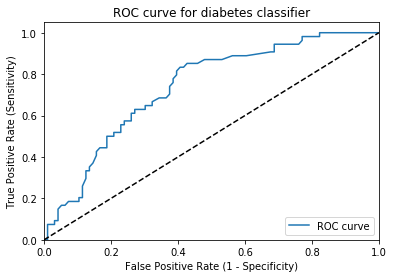

In [30]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
def calculate_roc_curve(y_test, y_pred, pos_label):
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    #Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC curve for diabetes classifier')
    plt.legend(loc="lower right")
    plt.show()

#calculate ROC curve
preds= random_clf.predict_proba(X_test)[:,1]
calculate_roc_curve(y_test, preds,2)

In [35]:
import sklearn

In [36]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(sklearn.metrics.roc_auc_score(y_test, y_pred))

0.5


### K-fold cross-validation
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [19]:
num_folds = 10
seed = 77

In [20]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [21]:
results = cross_val_score(rfm,X, y, cv=kfold)

In [22]:
results

array([0.7 , 0.76, 0.76, 0.86, 0.8 , 0.78, 0.82, 0.8 , 0.68, 0.78])

In [23]:
np.mean(abs(results))

0.774

In [24]:
results.std()

0.05063595560468864

### Leave One Out Cross-Validation

In [25]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [26]:
# You Will do it on X_train, y_train to save time. It will take too much time, hence not recommended for bigger data
scores = cross_val_score(rfm, X_train, y_train, cv=LeaveOneOut())
scores

KeyboardInterrupt: 

Because we have 350 samples, the leave one out cross-validation yields scores for 350 trials, and the score indicates either defaulter (1.0) or non-defaulter (0.0) prediction. Taking the mean of these gives an estimate of the error rate:

In [ ]:
scores.mean()

In [ ]:
scores.std()

### Stratified cross-validation( Bonus)
#### k-fold cross validation with stratification

In [ ]:
k = 10

In [ ]:
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k, random_state = 55)
results = cross_val_score(rfm, X, y, cv = stratified_kfold)

In [ ]:
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [ ]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

In [ ]:
### Stratified cross-validation is giving better result